In [1]:
from pathlib import Path

import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('dark_background')

%load_ext autoreload

%autoreload 2

In [2]:
root_folder = Path.cwd().parent.parent
data_folder = Path(root_folder).joinpath('data', 'external')

import sys
sys.path.append(str(root_folder))

In [3]:
from src.data.task_1_food_security.dataset import Dataset

In [4]:
ds = Dataset(root_folder=root_folder)

ds.prepare_dataset_array()

In [5]:
ds.idx_train

0       True
1       True
2       True
3       True
4       True
       ...  
292    False
293    False
294    False
295    False
296    False
Name: season, Length: 297, dtype: bool

In [6]:
import tensorflow as tf
from keras.layers import LSTM, Conv2D, BatchNormalization, Dropout
from keras.optimizers import Adam, SGD, RMSprop
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
import numpy
from keras import backend as K

Using TensorFlow backend.


In [7]:
def create_new_model(optimizers="adam", lr=None, batch_norm=False, batch=100, dropout_rate=0.0):
    def root_mean_sqr_err(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=1))
    model = Sequential()
    model.add(LSTM(126, input_shape=(36, 11)))
    if batch_norm:
        model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    # model.add(Conv2D())
    model.add(Dense(1, activation='linear'))
    if optimizers == "adam":
        if lr is not None:
            opt = Adam(lr=lr)
        else:
            opt = Adam()
    elif optimizers == "sgd":
        if lr is not None:
            opt = SGD(lr=lr)
        else:
            opt = SGD()
    elif optimizers == "rmsprop":
        if lr is not None:
            opt = RMSprop(lr=lr)
        else:
            opt = RMSprop()
    model.compile(loss=root_mean_sqr_err,
              optimizer=opt,
              metrics=[tf.keras.losses.MeanSquaredError(), root_mean_sqr_err])
    return model

In [8]:
x = ds.X_train
y = ds.y_train_sev


# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# create model
model = KerasRegressor(build_fn=create_new_model, verbose=0)
# grid search epochs, batch size and optimizer
optimizers = ['adam']
lr = [0.01, 0.001]
batch_size = [100]
epochs = [50, 100, 200]
batch_norm = [True, False]
dropout_rate = [0.0,  0.3, 0.6]


# param_grid = dict(lr = lr, epochs=epochs, batch_size=batch_size, batch_norm=batch_norm, dropout_rate=dropout_rate,
#                   optimizers=optimizers) # dict(optimizer=optimizers, epochs=epochs, batch_size=batches, batch_norm=batch_norm)
# model = KerasRegressor(build_fn=create_new_model, verbose=0)
# grid = GridSearchCV(estimator=model, param_grid=param_grid,
#                     verbose=2,
#                     scoring='neg_root_mean_squared_error', cv=3)

In [88]:
# grid_result = grid.fit(x, y)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] batch_norm=True, batch_size=100, dropout_rate=0.0, epochs=50, lr=0.01, optimizers=adam 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  batch_norm=True, batch_size=100, dropout_rate=0.0, epochs=50, lr=0.01, optimizers=adam, total=   2.8s
[CV] batch_norm=True, batch_size=100, dropout_rate=0.0, epochs=50, lr=0.01, optimizers=adam 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV]  batch_norm=True, batch_size=100, dropout_rate=0.0, epochs=50, lr=0.01, optimizers=adam, total=   2.9s
[CV] batch_norm=True, batch_size=100, dropout_rate=0.0, epochs=50, lr=0.01, optimizers=adam 
[CV]  batch_norm=True, batch_size=100, dropout_rate=0.0, epochs=50, lr=0.01, optimizers=adam, total=   2.9s
[CV] batch_norm=True, batch_size=100, dropout_rate=0.0, epochs=50, lr=0.001, optimizers=adam 
[CV]  batch_norm=True, batch_size=100, dropout_rate=0.0, epochs=50, lr=0.001, optimizers=adam, total=   2.9s
[CV] batch_norm=True, batch_size=100, dropout_rate=0.0, epochs=50, lr=0.001, optimizers=adam 
[CV]  batch_norm=True, batch_size=100, dropout_rate=0.0, epochs=50, lr=0.001, optimizers=adam, total=   2.9s
[CV] batch_norm=True, batch_size=100, dropout_rate=0.0, epochs=50, lr=0.001, optimizers=adam 
[CV]  batch_norm=True, batch_size=100, dropout_rate=0.0, epochs=50, lr=0.001, optimizers=adam, total=   2.9s
[CV] batch_norm=True, batch_size=100, dropout_rate=0.0, epochs=100, lr=0.01, optim

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:  9.5min finished


In [89]:
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
# 	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.341080 using {'batch_norm': True, 'batch_size': 100, 'dropout_rate': 0.6, 'epochs': 100, 'lr': 0.01, 'optimizers': 'adam'}
-0.395243 (0.132906) with: {'batch_norm': True, 'batch_size': 100, 'dropout_rate': 0.0, 'epochs': 50, 'lr': 0.01, 'optimizers': 'adam'}
-0.392016 (0.129401) with: {'batch_norm': True, 'batch_size': 100, 'dropout_rate': 0.0, 'epochs': 50, 'lr': 0.001, 'optimizers': 'adam'}
-0.403388 (0.120999) with: {'batch_norm': True, 'batch_size': 100, 'dropout_rate': 0.0, 'epochs': 100, 'lr': 0.01, 'optimizers': 'adam'}
-0.382084 (0.128320) with: {'batch_norm': True, 'batch_size': 100, 'dropout_rate': 0.0, 'epochs': 100, 'lr': 0.001, 'optimizers': 'adam'}
-0.422254 (0.110123) with: {'batch_norm': True, 'batch_size': 100, 'dropout_rate': 0.0, 'epochs': 200, 'lr': 0.01, 'optimizers': 'adam'}
-0.464896 (0.089390) with: {'batch_norm': True, 'batch_size': 100, 'dropout_rate': 0.0, 'epochs': 200, 'lr': 0.001, 'optimizers': 'adam'}
-0.403352 (0.128975) with: {'batch_norm': Tru

In [92]:
# summarize results
# grid_result.validate()
#

GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f3df84251d0>,
             param_grid={'batch_norm': [True, False], 'batch_size': [100],
                         'dropout_rate': [0.0, 0.3, 0.6],
                         'epochs': [50, 100, 200], 'lr': [0.01, 0.001],
                         'optimizers': ['adam']},
             scoring='neg_root_mean_squared_error', verbose=2)

In [14]:

# grid_result
#

GridSearchCV(estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f41937a4110>,
             param_grid={'batch_norm': [True, False], 'epochs': [100],
                         'lr': [0.01, 0.005, 0.001]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [11]:
from sklearn.model_selection import train_test_split

xtr, xts, ytr, yts = train_test_split(x,y, test_size=0.1)
def root_mean_sqr_err(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=1))

In [14]:
from keras.callbacks import ModelCheckpoint
chk = ModelCheckpoint('best_model.pkl',
                      monitor='val_acc',
                      save_best_only=True,
                      mode='max',
                      verbose=1)

history = model.fit(xtr,
                    ytr,
                    epochs=500,
                    batch_size=100,
                    callbacks=[chk],
                    validation_data=(xtr,ytr))

dict_keys(['val_loss', 'val_mean_squared_error', 'val_root_mean_sqr_err', 'loss', 'mean_squared_error', 'root_mean_sqr_err'])


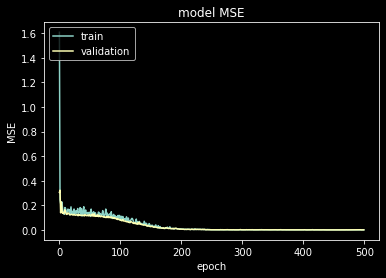

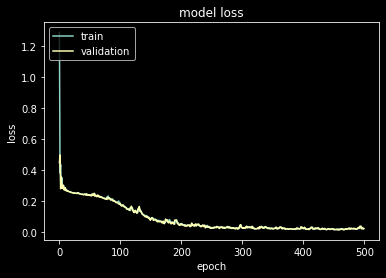

In [15]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

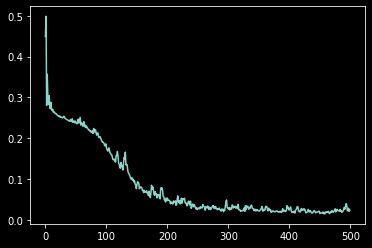

In [16]:
plt.plot(history.history['val_root_mean_sqr_err'])

In [18]:
model.score(ds.X_test, ds.y_test_sev)

-0.36957834031846787

In [20]:
nn_pred = model.predict(ds.X_test)

In [21]:
id = ds.idx_test


In [27]:
id.reset_index()

,index,season
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False
...,...,...
292,292,True
293,293,True
294,294,True
295,295,True


In [31]:
df = ds.df_y.reset_index()[ds.idx_test].copy()

In [34]:
df['severity_LSTM'] = nn_pred



In [36]:
df[['severity', 'severity_LSTM']]

,severity,severity_LSTM
252,1.090000,2.032196
253,1.165003,1.524747
254,1.637499,1.256999
255,1.149999,1.592615
256,1.060001,1.347896
257,1.555013,1.647581
258,1.382494,1.345253
259,1.075001,1.601074
260,1.209997,1.500386
261,1.660002,1.400448


In [38]:
ds.save_predicted(nn_pred, "LSTM")

In [41]:
df_unit = ds.save_predicted(nn_pred, "LSTM", 2019)

In [42]:
df_unit.columns


Index(['adm2_name_code', 'NAME', 'severity_2013', 'phase1_2013', 'phase2_2013',
       'phase3_2013', 'phase4_2013', 'phase5_2013', 'severity_2014',
       'phase1_2014', 'phase2_2014', 'phase3_2014', 'phase4_2014',
       'phase5_2014', 'severity_2015', 'phase1_2015', 'phase2_2015',
       'phase3_2015', 'phase4_2015', 'phase5_2015', 'severity_2016',
       'phase1_2016', 'phase2_2016', 'phase3_2016', 'phase4_2016',
       'phase5_2016', 'severity_2017', 'phase1_2017', 'phase2_2017',
       'phase3_2017', 'phase4_2017', 'phase5_2017', 'severity_2018',
       'phase1_2018', 'phase2_2018', 'phase3_2018', 'phase4_2018',
       'phase5_2018', 'severity_2019', 'phase1_2019', 'phase2_2019',
       'phase3_2019', 'phase4_2019', 'phase5_2019', 'geometry',
       'severity_LSTM_2019'],
      dtype='object')